<a href="https://colab.research.google.com/github/chitranshp/Image-noise-reduction/blob/master/Convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep autoencoder**

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [3]:
( x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= x_train.astype(float)/255.0
x_test = x_test.astype(float)/255.0



11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train_noisy = x_train + np.random.rand(60000, 28, 28) * 0.9
x_test_noisy = x_test + np.random.rand(10000, 28, 28) * 0.9
x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

x_train_noisy_clf = np.reshape(x_train_noisy, (60000,784))
x_test_noisy_clf = np.reshape(x_test_noisy, (10000, 784))

In [0]:
def plot(x, p, labels = False):
    plt.figure(figsize = (30, 10))
    for i in range(1, 10):
        plt.subplot(1, 10, i)
        plt.imshow(x[i+30], cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
          plt.xlabel(np.argmax(p[i+20]))
    plt.show()

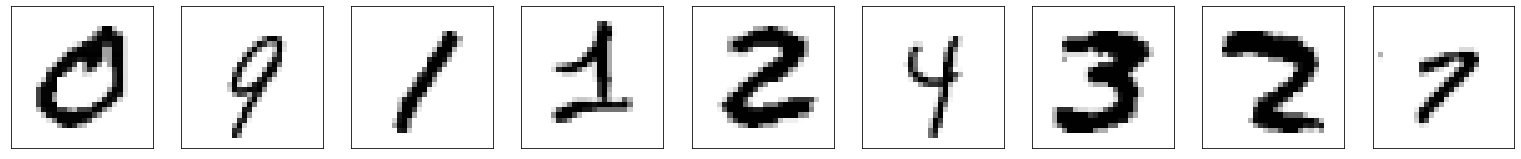

In [6]:
plot(x_train, None)

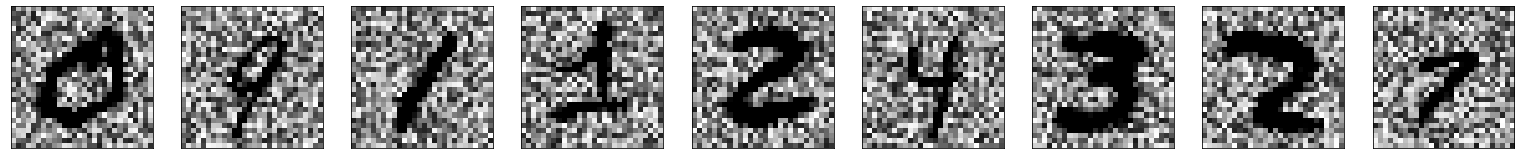

In [7]:
plot(x_train_noisy, None)

In [0]:
input_img = Input(shape = (28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [10]:
print('Validation loss:')
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                verbose = False,
                batch_size=256,
                shuffle=True,
                validation_split = 0.2,
                callbacks=[EarlyStopping(monitor = 'val_loss', patience = 5),
                             LambdaCallback(on_epoch_end = lambda epoch, logs: print('Epoch {}: {}'.format(epoch, logs['val_loss'])))
                ]
                )

Validation loss:
Epoch 0: 0.23133736848831177
Epoch 1: 0.18864619731903076
Epoch 2: 0.17361462116241455
Epoch 3: 0.16367308795452118
Epoch 4: 0.15663692355155945
Epoch 5: 0.15042833983898163
Epoch 6: 0.1460142880678177
Epoch 7: 0.14273576438426971
Epoch 8: 0.1406230628490448
Epoch 9: 0.1378256380558014
Epoch 10: 0.13601502776145935
Epoch 11: 0.1348206251859665
Epoch 12: 0.1332409530878067
Epoch 13: 0.1327545940876007
Epoch 14: 0.1313803642988205
Epoch 15: 0.13021154701709747
Epoch 16: 0.12976332008838654
Epoch 17: 0.12895238399505615
Epoch 18: 0.1291218250989914
Epoch 19: 0.12851768732070923
Epoch 20: 0.12741632759571075
Epoch 21: 0.1268520951271057
Epoch 22: 0.12670716643333435
Epoch 23: 0.12618958950042725
Epoch 24: 0.12604908645153046
Epoch 25: 0.1252201497554779
Epoch 26: 0.12480319291353226
Epoch 27: 0.12474703788757324
Epoch 28: 0.12407992780208588
Epoch 29: 0.12380144000053406
Epoch 30: 0.12368177622556686
Epoch 31: 0.12363004684448242
Epoch 32: 0.12313304841518402
Epoch 33: 0.1

In [0]:
pred = autoencoder.predict(x_test_noisy)
#pred_clf = np.reshape(pred, (10000, 784))

In [0]:
pred = pred.reshape((10000,28, 28))

Original images without any synthetic noise

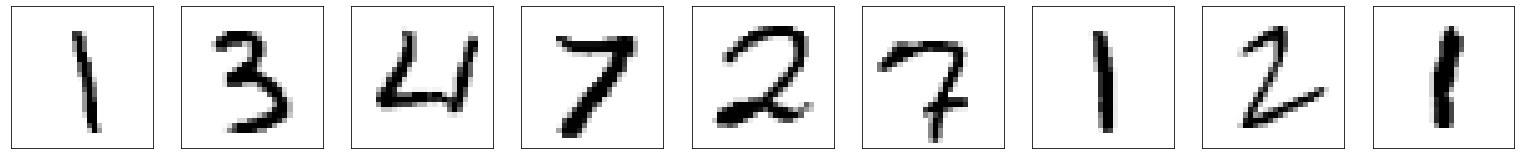

In [24]:
plot(x_test, None)

Images with noise

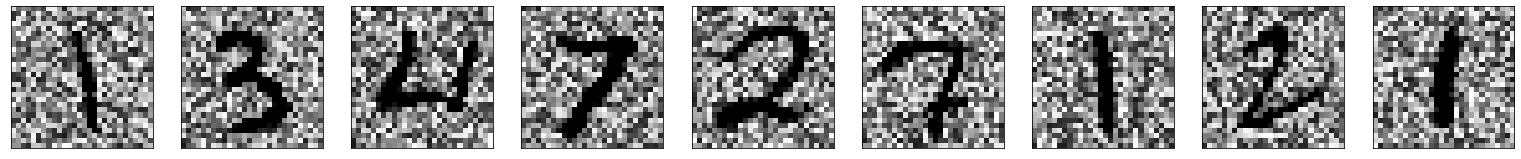

In [25]:
plot(x_test_noisy, None)

Images after noise removal from convolutional autoencoder

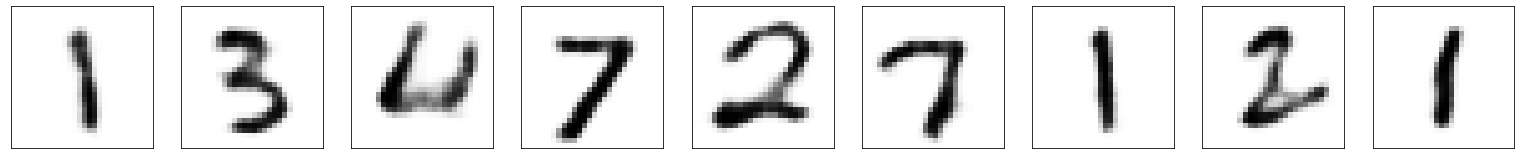

In [26]:
plot(pred, None)
